### Ogólne wprowadzenie

Algorytm, który różni się od algorytmu Dijkstry tym, że akceptujemy również ujemne wagi krawędzi. W takim przypadku chcemy, aby ścieżki były wyznaczane prawidłowo (tzn. abyśmy umieli sobie poradzić z tzw. ujemnymi cyklami). Implementacja jest dużo łatwiejsza od implementacji algorytmu Dijkstry i nie wymaga stosowania kolejki priorytetowej (ani innych struktur innych niż tablice).
###### UWAGA
Dla przykładu, implementacja algorytmu Dijkstry z wykładu się zapętli w nieskończoność na grafie, który ma ujemny cykl, a implementacja z BIT Algo się nie zapętli, lecz wyznaczy błędnie długości ścieżek.
###### UWAGA
Ten algorytm, podobnie jak algorytm Dijkstry, działa zarówno dla grafów skierowanych, jak i dla grafów nieskierowanych.
###### UWAGA
Jeżeli na wejściu otrzymujemy graf nieskierowany i w tym grafie występuje ujemny cykl, zawsze wszystkie odległości (wagi) ścieżek, jakie uzyskamy na wyjściu, będą równie $ -\infty $. Wynika to stąd, że w grafie nieskierowanym możemy poruszać się w dowolną stronę, więc chcąc zmnieszyć wagę ścieżki, zawsze wejdziemy w ujemny cykl.

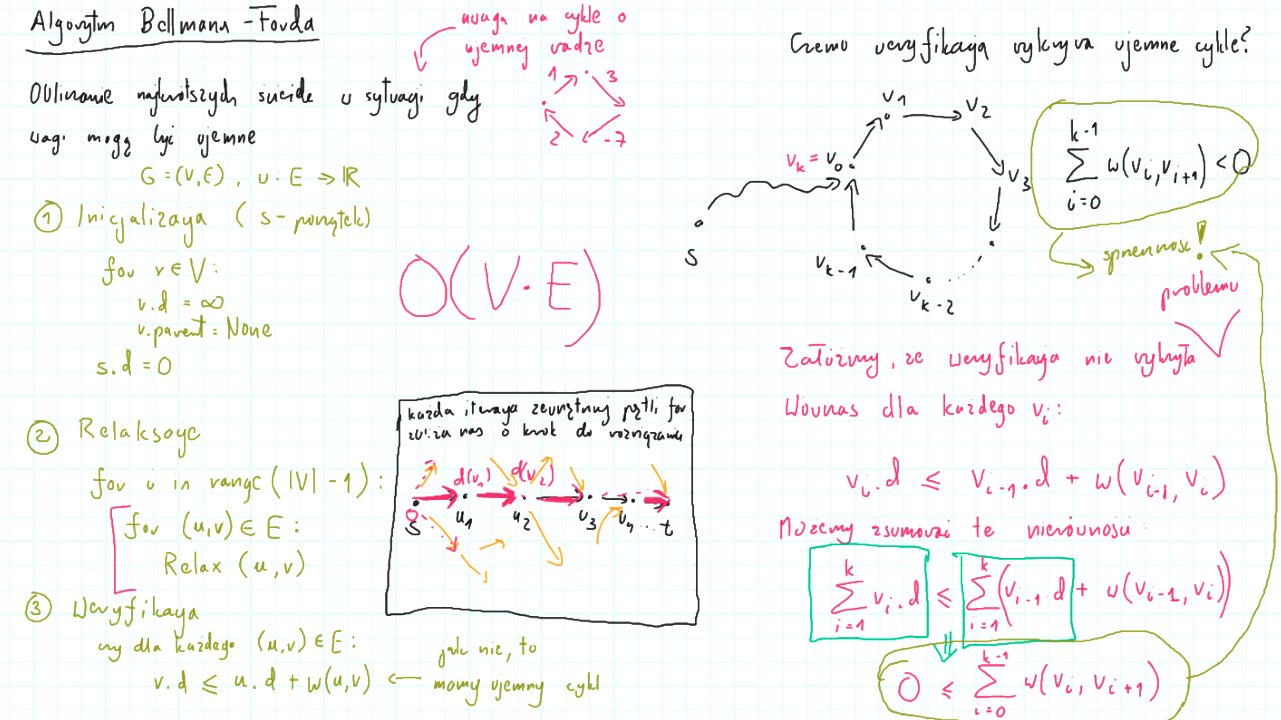

###### Dodatkowe materiały na YouTube:
LINK: https://www.youtube.com/watch?v=lyw4FaxrwHg

# Dla listowej reprezentacji grafu

### Złożoność

###### Obliczeniowa:
$ O(E \cdot V) $  - gorsza niż w algorytmie Dijkstry, dlatego tego algorytmu używamy tylko dla grafów, w których mogą wystąpić ujemne wagi krawędzi
###### Pamięciowa:
$ O(V) $  - tylko tablica długości ścieżek

### Implementacja #1
##### (Tylko wyznaczanie długości najkrótszej ścieżki)

In [1]:
def bellman_ford(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    weights[s] = 0
    
    # Calculate shortest paths distances
    for _ in range(n):
        for u in range(n):
            for v, weight in G[u]:
                if weights[u] + weight < weights[v]:
                    weights[v] = weights[u] + weight
                
    # Look for negative cycles and replace distances
    # with a -infinity if a vertex is affected by
    # a negative cycle
    for _ in range(n):
        for u in range(n):
            for v, weight in G[u]:
                # If we still can relax a u vertex, there
                # must be a negative cycle
                if weights[u] + weight < weights[v]:
                    weights[v] = -inf
        
    return weights

###### Kilka testów

##### Pomocnicze:

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G


def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
    return G

##### Testy:

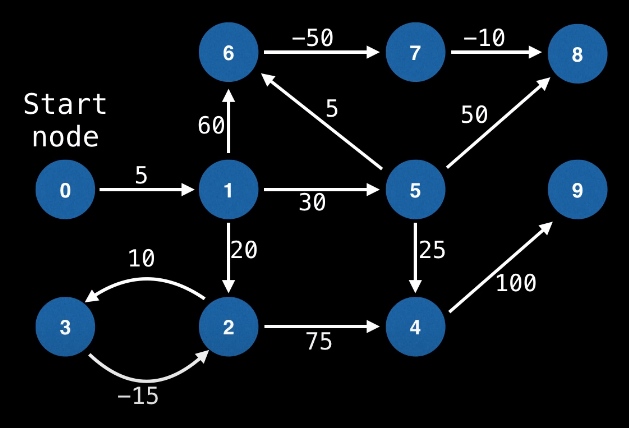

In [3]:
E = [(0, 1, 5), (1, 6, 60), (6, 7, -50), (7, 8, -10), (5, 6, 5), (1, 5, 30), (5, 8, 50), (1, 2, 20),
     (2, 3, 10), (3, 2, -15), (2, 4, 75), (4, 9, 100), (5, 4, 25)]
G = directed_weighted_graph_list(E)

s = 0

print(bellman_ford(G, s))

# Dla grafu nieskierowanego możemy iść w dowolną stronę, więc zawsze wejdziemy w ujemny cykl
G = undirected_weighted_graph_list(E)

print(bellman_ford(G, s))

[0, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf]
[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]


### Implementacja #2
##### (Z wyznaczaniem tablicy rodziców - możliwość odtwarzania ścieżki)

In [4]:
def bellman_ford(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    weights[s] = 0
    
    # Calculate shortest paths distances
    for _ in range(n):
        for u in range(n):
            for v, weight in G[u]:
                if weights[u] + weight < weights[v]:
                    weights[v] = weights[u] + weight
                    parents[v] = u
                
    # Look for negative cycles and replace distances
    # with a -infinity if a vertex is affected by
    # a negative cycle
    for _ in range(n):
        for u in range(n):
            for v, weight in G[u]:
                # If we still can relax a u vertex, there
                # must be a negative cycle
                if weights[u] + weight < weights[v]:
                    weights[v] = -inf
        
    return weights, parents


def get_shortest_path(G, s, t):
    weights, parents = bellman_ford(G, s)
    if weights[t] == float('-inf'):
        # When there is a negative cycle, there is no shortest path (this is endless)
        return None
    
    path = []
    while t != s:
        path.append(t)
        t = parents[t]
    path.append(s)
    
    return path[::-1]

"""
Ulepszona wersja funkcji, która pozwala na odtworzenie ścieżek, na których występuje
ujemny cykl. Wówczas waga takiej ścieżki zawsze wynosi -inf, więc bierzemy dowolną
o tej wadze.
"""
def get_shortest_path_with_cycle(G, parents, s, t):
    # If no path exists
    if parents[t] is None: return []
    it = 0
    n = len(parents)
    iters = [-1] * n
    seq = []
    
    last_u = None
    
    while t is not None:
        # Check if we visited the same vertex again
        # (If we have a negative cycle)
        if iters[t] >= 0:
            cycle = tuple(seq[i] for i in range(len(seq) - 1, iters[t] - 1, -1))
            last_u = cycle[0]
            for i in range(len(seq) - iters[t]): seq.pop()
            seq.append(cycle)
            break
        seq.append(t)
        iters[t] = it
        t = parents[t]
        it += 1
        
    # If there was a cycle
    if last_u is not None:
        new_parents = [None] * n

        def dfs(u):
            if u == last_u: return
            for v, _ in G[u]:
                if new_parents[v] is None:
                    new_parents[v] = u
                    dfs(v)

        new_parents[s] = s
        dfs(s)
        new_parents[s] = None
        
        u = new_parents[last_u]
        while u is not None:
            seq.append(u)
            u = new_parents[u]
    
    seq.reverse()
    return seq

###### Kilka testów

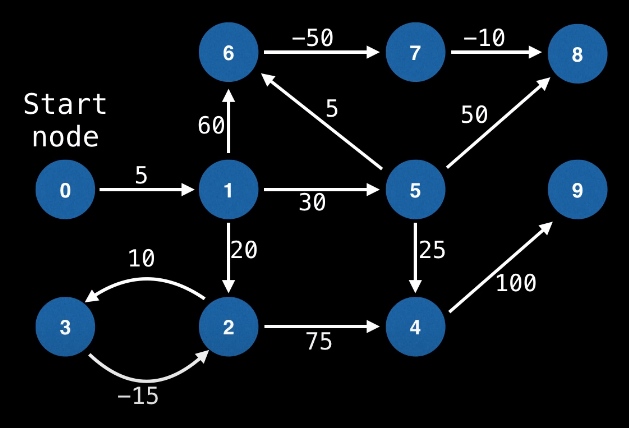

In [5]:
E = [(0, 1, 5), (1, 6, 60), (6, 7, -50), (7, 8, -10), (5, 6, 5), (1, 5, 30), (5, 8, 50), (1, 2, 20),
     (2, 3, 10), (3, 2, -15), (2, 4, 75), (4, 9, 100), (5, 4, 25)]
G = directed_weighted_graph_list(E)

print(bellman_ford(G, 0))
print(get_shortest_path(G, 0, 9))
print(get_shortest_path(G, 0, 8))

# Dla grafu nieskierowanego możemy iść w dowolną stronę, więc zawsze wejdziemy w ujemny cykl
G = undirected_weighted_graph_list(E)

print(bellman_ford(G, 0))
print(get_shortest_path(G, 0, 9))
print(get_shortest_path(G, 0, 8))

([0, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf], [None, 0, 3, 2, 2, 1, 5, 6, 7, 4])
None
[0, 1, 5, 6, 7, 8]
([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf], [1, 6, 3, 2, 5, 8, 7, 8, 7, 4])
None
None


In [6]:
G = directed_weighted_graph_list(E + [(10, 11, 1)])

weights, parents = bellman_ford(G, 0)
print(parents)
print(get_shortest_path_with_cycle(G, parents, 0, 9))

[None, 0, 3, 2, 2, 1, 5, 6, 7, 4, None, None]
[0, 1, 2, (3, 2), 4, 9]


# Dla macierzowej reprezentacji grafu

### Uwagi

Implementacja algorytmu dla macierzy ma jedynie sens, gdy graf jest bardzo gęsty.

### Złożoność

###### Obliczeniowa:
$ O(V^3) $  - niestety, ale trzeba przejrzeć całą macierz $ V $ razy (chyba, że byśmy ją przerobili na graf w postaci list sąsiedztwa, aby uzyskać lepszą złożoność)
###### Pamięciowa:
$ O(V) $  - tylko tablica długości ścieżek

### Implementacja #1
##### (Tylko wyznaczanie długości najkrótszej ścieżki)

In [7]:
def bellman_ford(G: 'graph represented by adjacency matrix', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    weights[s] = 0
    
    # Calculate shortest paths distances
    for _ in range(n):
        for u in range(n):
            for v in range(n):
                # Continue if there is no edge
                if G[u][v] == inf: continue
                if weights[u] + G[u][v] < weights[v]:
                    weights[v] = weights[u] + G[u][v]
                
    # Look for negative cycles and replace distances
    # with a -infinity if a vertex is affected by
    # a negative cycle
    for _ in range(n):
        for u in range(n):
            for v in range(n):
                # Continue if there is no edge
                if G[u][v] == inf: continue
                # If we still can relax a u vertex, there
                # must be a negative cycle
                if weights[u] + G[u][v] < weights[v]:
                    weights[v] = -inf
        
    return weights

###### Kilka testów

##### Pomocnicze:

In [8]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[float('inf')] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G


def directed_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[float('inf')] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
    return G

##### Testy:

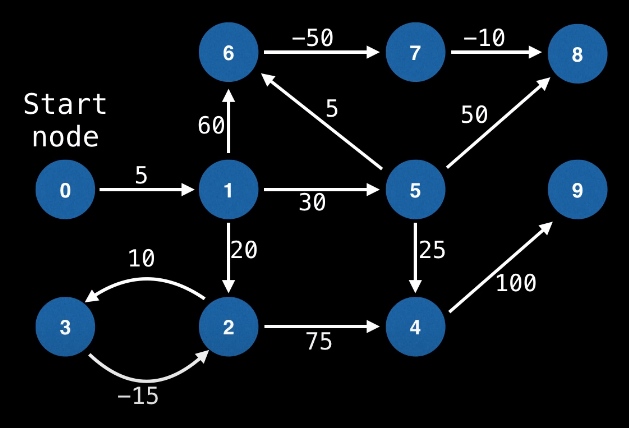

In [9]:
E = [(0, 1, 5), (1, 6, 60), (6, 7, -50), (7, 8, -10), (5, 6, 5), (1, 5, 30), (5, 8, 50), (1, 2, 20),
     (2, 3, 10), (3, 2, -15), (2, 4, 75), (4, 9, 100), (5, 4, 25)]
G = directed_weighted_graph_matrix(E)

s = 0

print(bellman_ford(G, s))

[0, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf]


### Implementacja #2
##### (Z wyznaczaniem tablicy rodziców - możliwość odtwarzania ścieżki)

In [10]:
def bellman_ford(G: 'graph represented by adjacency matrix', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    weights[s] = 0
    
    # Calculate shortest paths distances
    for _ in range(n):
        for u in range(n):
            for v in range(n):
                # Continue if there is no edge
                if G[u][v] == inf: continue
                if weights[u] + G[u][v] < weights[v]:
                    weights[v] = weights[u] + G[u][v]
                    parents[v] = u
                
    # Look for negative cycles and replace distances
    # with a -infinity if a vertex is affected by
    # a negative cycle
    for _ in range(n):
        for u in range(n):
            for v in range(n):
                # Continue if there is no edge
                if G[u][v] == inf: continue
                # If we still can relax a u vertex, there
                # must be a negative cycle
                if weights[u] + G[u][v] < weights[v]:
                    weights[v] = -inf
        
    return weights, parents


def get_shortest_path(G, s, t):
    weights, parents = bellman_ford(G, s)
    if weights[t] == float('-inf'):
        # When there is a negative cycle, there is no shortest path (this is endless)
        return None
    
    path = []
    while t != s:
        path.append(t)
        t = parents[t]
    path.append(s)
    
    return path[::-1]

###### Kilka testów

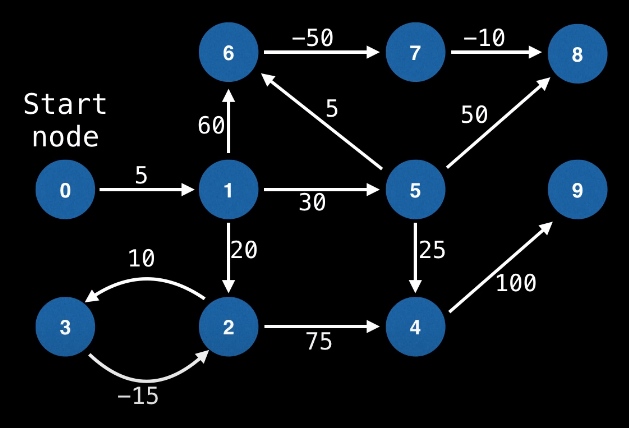

In [11]:
E = [(0, 1, 5), (1, 6, 60), (6, 7, -50), (7, 8, -10), (5, 6, 5), (1, 5, 30), (5, 8, 50), (1, 2, 20),
     (2, 3, 10), (3, 2, -15), (2, 4, 75), (4, 9, 100), (5, 4, 25)]
G = directed_weighted_graph_matrix(E)

print(bellman_ford(G, 0))
print(get_shortest_path(G, 0, 9))
print(get_shortest_path(G, 0, 8))

# Dla grafu nieskierowanego możemy iść w dowolną stronę, więc zawsze wejdziemy w ujemny cykl
G = undirected_weighted_graph_matrix(E)

print(bellman_ford(G, 0))
print(get_shortest_path(G, 0, 9))
print(get_shortest_path(G, 0, 8))

([0, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf], [None, 0, 3, 2, 2, 1, 5, 6, 7, 4])
None
[0, 1, 5, 6, 7, 8]
([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf], [1, 6, 3, 2, 5, 8, 7, 8, 7, 4])
None
None
